In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

# Load dataset
df = pd.read_csv('advertising.csv')
print("Dataset columns:", df.columns.tolist())
print("\nFirst 5 rows:")
df.head()

Dataset columns: ['TV', 'Radio', 'Newspaper', 'Sales']

First 5 rows:


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


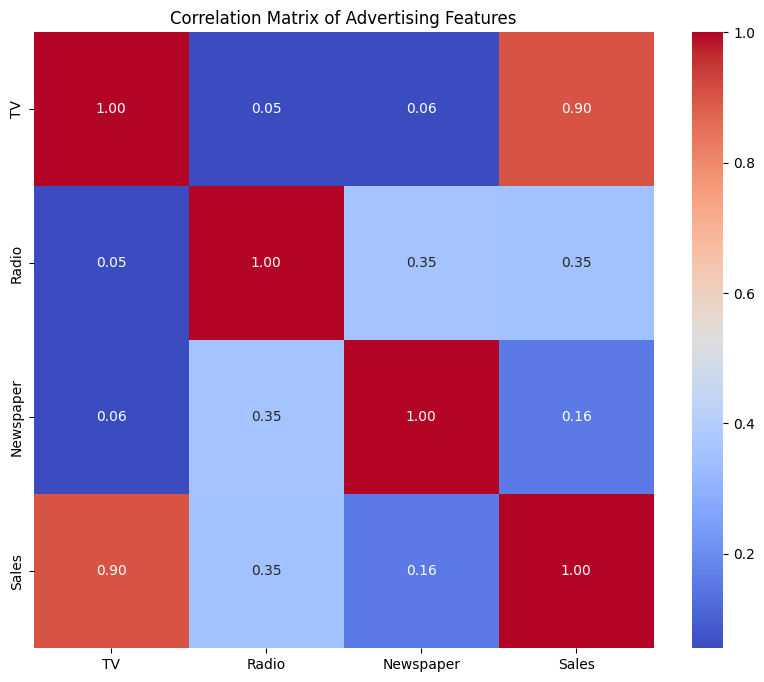

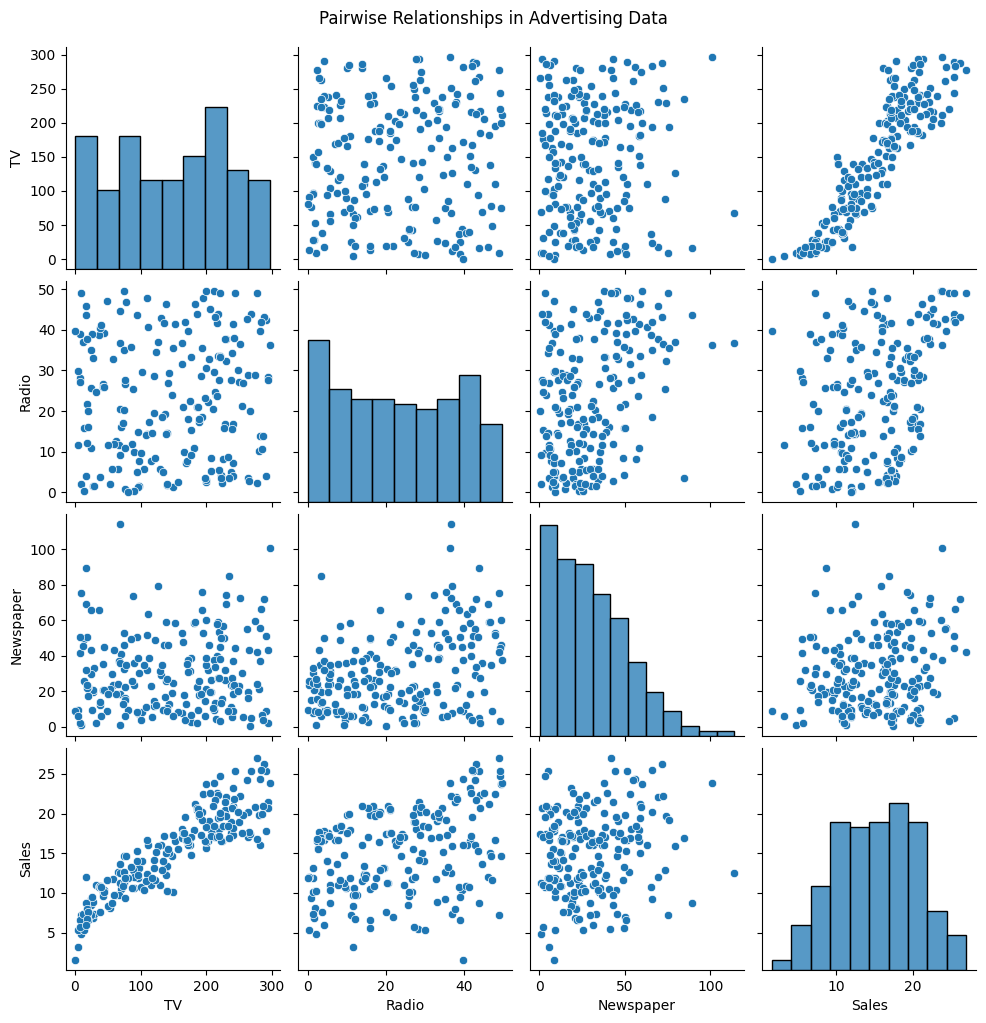

In [3]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Advertising Features')
plt.show()

# Pairplot to visualize relationships
sns.pairplot(df)
plt.suptitle('Pairwise Relationships in Advertising Data', y=1.02)
plt.show()

In [4]:
# Prepare features and target
X = df.drop(columns=['Sales'])
y = df['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add bias term (column of 1s)
X_train = np.c_[X_train, np.ones(X_train.shape[0])]
X_test = np.c_[X_test, np.ones(X_test.shape[0])]

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (150, 4)
Test set shape: (50, 4)


In [ ]:
#

In [6]:
def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    m = len(y)
    n_features = X.shape[1]
    weights = np.zeros(n_features)
    cost_history = []
    
    for epoch in range(epochs):
        # Calculate predictions and error
        predictions = X.dot(weights)
        error = predictions - y
        
        # Compute gradient (average across all samples)
        gradient = (1/m) * X.T.dot(error)
        
        # Update weights
        weights -= learning_rate * gradient
        
        # Calculate and store cost (MSE)
        cost = (1/(2*m)) * np.sum(error**2)
        cost_history.append(cost)
        
        # Print progress every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Cost = {cost:.4f}")
    
    return weights, cost_history

In [7]:
print("Training Gradient Descent Model...")
weights, cost_history = gradient_descent(X_train, y_train, learning_rate=0.01, epochs=1000)

# 5. Evaluate the model
def evaluate(X, y, weights):
    predictions = X.dot(weights)
    mse = np.mean((y - predictions)**2)
    mae = np.mean(np.abs(y - predictions))
    r2 = 1 - (np.sum((y - predictions)**2) / np.sum((y - np.mean(y))**2))
    return mse, mae, r2

Training Gradient Descent Model...
Epoch 0: Cost = 134.8245
Epoch 100: Cost = 19.1985
Epoch 200: Cost = 3.8011
Epoch 300: Cost = 1.7389
Epoch 400: Cost = 1.4613
Epoch 500: Cost = 1.4237
Epoch 600: Cost = 1.4185
Epoch 700: Cost = 1.4178
Epoch 800: Cost = 1.4176
Epoch 900: Cost = 1.4176


In [8]:
test_mse, test_mae, test_r2 = evaluate(X_test, y_test, weights)
print("\nModel Evaluation:")
print(f"MSE: {test_mse:.4f}")
print(f"MAE: {test_mae:.4f}")
print(f"R²: {test_r2:.4f}")



Model Evaluation:
MSE: 2.4047
MAE: 1.1201
R²: 0.9115


In [9]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

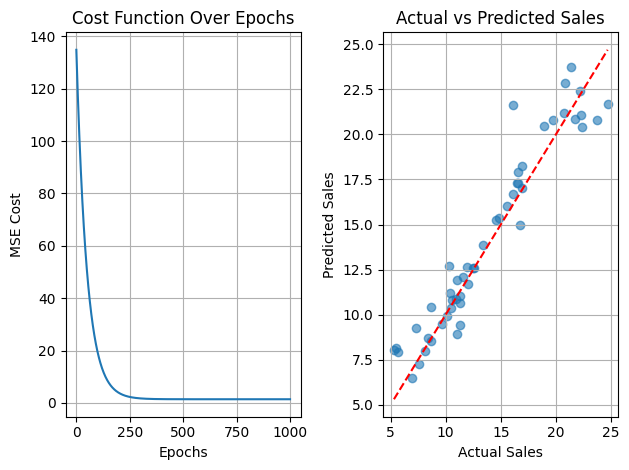

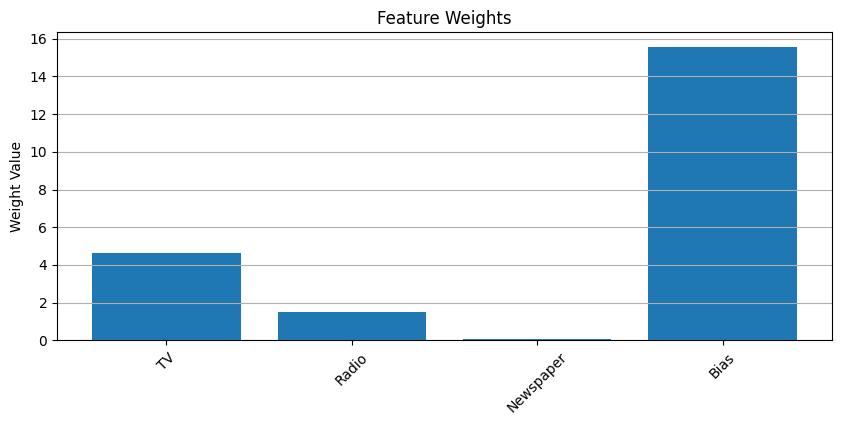

In [11]:
plt.subplot(1, 2, 1)
plt.plot(cost_history)
plt.title('Cost Function Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE Cost')
plt.grid(True)

# Actual vs Predicted
plt.subplot(1, 2, 2)
predictions = X_test.dot(weights)
plt.scatter(y_test, predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.grid(True)

plt.tight_layout()
plt.show()

# 7. Feature Importance
feature_names = df.drop(columns=['Sales']).columns.tolist() + ['Bias']
plt.figure(figsize=(10, 4))
plt.bar(feature_names, weights)
plt.title('Feature Weights')
plt.ylabel('Weight Value')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()